Logic is for 1D data

In [ ]:
# --- STEP 1: Import Libraries & Load Data ---
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Keras has the MNIST dataset built-in, which makes it super easy to load.
# x_train/x_test are the images (the input), y_train/y_test are the labels (the output).
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# --- STEP 2: Preprocess the Data ---
# ANNs need a flat, 1D vector as input. Our images are 28x28 pixels.
# We need to reshape them from (28, 28) to a single vector of 784 pixels.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# It's good practice to normalize the data.
# Pixel values are from 0 to 255. We'll scale them to be between 0 and 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# The labels are integers from 0 to 9. For classification, we need to
# convert them to "one-hot" vectors. E.g., the label '5' becomes [0,0,0,0,0,1,0,0,0,0]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# --- STEP 3: Build the ANN Model ---
# We use a Sequential model, which is a simple stack of layers.
model = keras.Sequential([
    # This is the input layer and the first hidden layer.
    # 'Dense' means every neuron is connected to every neuron in the next layer.
    # '784' is the number of input features (our 28x28 image flattened).
    # '128' is the number of neurons in this hidden layer.
    # 'relu' is the activation function.
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    
    # This is our second hidden layer.
    keras.layers.Dense(64, activation='relu'),

    # This is the output layer.
    # It must have 10 neurons, one for each class (digits 0-9).
    # 'softmax' converts the output into a probability distribution,
    # so we can see which digit the model thinks is most likely.
    keras.layers.Dense(num_classes, activation='softmax')
])

# Print a summary of the model you just built.
print("--- Model Architecture ---")
model.summary()


# --- STEP 4: Compile the Model ---
# Before training, we configure the learning process.
model.compile(
    optimizer='adam',  # Adam is a popular, effective optimizer.
    loss='categorical_crossentropy',  # This loss function is used for multi-class classification.
    metrics=['accuracy']  # We want to track the accuracy during training.
)




# --- STEP 5: Train the Model ---
# Now we fit the model to our training data.
print("\n--- Starting Training ---")
history = model.fit(
    x_train, y_train,
    batch_size=128,  # Number of samples per update.
    epochs=10,       # Number of times to go through the entire dataset.
    verbose=1,
    validation_data=(x_test, y_test) # Data to check performance on after each epoch.
)


# --- STEP 6: Evaluate the Model ---
# Finally, check the model's performance on the test set.
print("\n--- Evaluating on Test Data ---")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

tf.keras.layers.Flatten(input_shape=(28, 28)) -> Converts 2d to 1D data

model.Dense -> keras (Dense) | matlab/pytorch (fully connected) [In terms of using the neural layer]

ANN requires a fixed size of inputs.
for project:

in terms of spectrogram (200 by 200) for fitting

also possible to input the total raw data.


softmax input -> convert the output in percentages (good for probabilities)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Model training begins
Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9008 - loss: 0.3477 - val_accuracy: 0.9418 - val_loss: 0.1946
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9518 - loss: 0.1624 - val_accuracy: 0.9557 - val_loss: 0.1470
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9633 - loss: 0.1202 - val_accuracy: 0.9609 - val_loss: 0.1238
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9699 - loss: 0.0969 - val_accuracy: 0.9662 - val_loss: 0.1123
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9748 - loss: 0.0812 - val_accuracy: 0.9691 - val_loss: 0.1019
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9786 - loss: 0.0688 - val_accuracy: 0.9726 - val_loss: 0.0967
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9813 - loss: 0.0598 - val_accuracy: 0.9705 - val_loss: 0.0980
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9836 - l

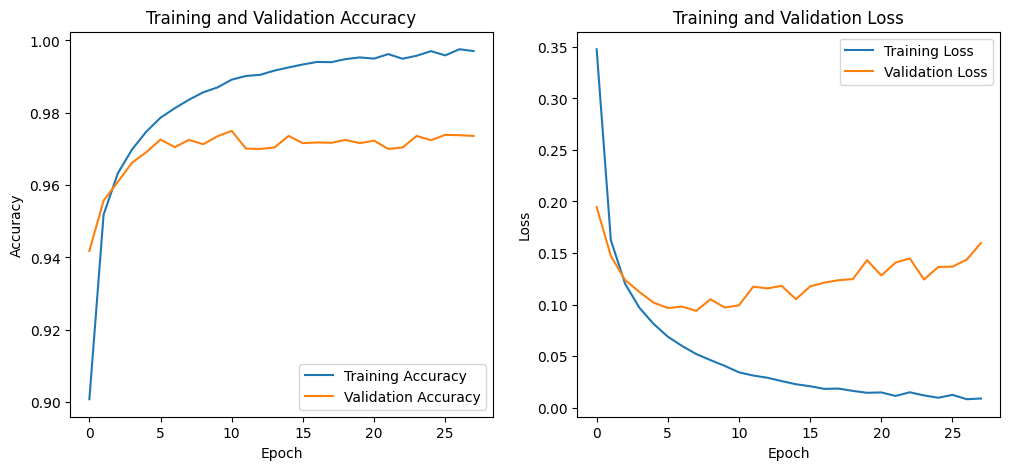


--- Evaluating on Test Data ---
Test loss: 0.0939
Test accuracy: 0.9725


'\ntraining_accuracy = history.history[\'accuracy\']\nvalidation_accuracy = history.history[\'val_accuracy\']\ntraining_loss = history.history[\'loss\']\nvalidation_loss = history.history[\'val_loss\']\n\n# The rest of the plotting code then uses these new variables...\n\nepoch_range = range(num_epochs)\nplt.subplot(1, 2, 1)\nplt.plot(epoch_range, training_accuracy, label = "Training Accuracy")\nplt.plot(epoch_range, validation_accuracy, label = "Value Accuracy")\nplt.legend(loc="lower right")\n\nplt.title("Training and Validation Accuracy")\nplt.subplot(1, 2, 2)\nplt.plot(epoch_range, training_loss, label="Training Loss")\nplt.plot(epoch_range, validation_loss, label="Value Accuracy")\nplt.legend(loc="lower right")\nplt.title("Training and Validation loss")\n\nplt.show()\n'

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # Downloads and loads the MNIST dataset for the project

x_train = x_train.reshape(60000, 28*28)
x_test =  x_test.reshape(10000, 28*28)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model_classes = 10

y_train = keras.utils.to_categorical(y_train, model_classes)
y_test = keras.utils.to_categorical(y_test, model_classes)

model = keras.Sequential([

    keras.layers.Dense(50, activation = 'relu', input_shape=(784,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(model_classes, activation='softmax')
])

model.summary()

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # multiclasses classification
    metrics = ['accuracy']
)


print('Model training begins') # Training and shows accuracy


# --- STEP 1: DEFINE THE RULE HERE ---
# Create the EarlyStopping callback object before you start training.
early_stopping = EarlyStopping(
    min_delta=0.001,       # Minimum amount of change to count as an improvement
    patience=20,           # How many epochs to wait for improvement before stopping
    restore_best_weights=True,
)

num_epochs = 100
history = model.fit(
    x_train, y_train,
    batch_size = 64,
    epochs = num_epochs,
    verbose=1, # Progress bar of the training
    validation_data = (x_test, y_test), # Data to check the performance of the training per iteration
    callbacks=[early_stopping] # Pass the rule
)




score = model.evaluate(x_test, y_test, verbose=0)



# The 'history' object from model.fit() contains the dictionary .history
# We extract the data into NEW variables. We do NOT re-assign the 'history' variable.

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a list of epoch numbers
# This dynamically gets the actual number of epochs that completed
epochs_range = range(len(training_accuracy))

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

# Finally, check the model's performance on the test set.
print("\n--- Evaluating on Test Data ---")
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')




"""
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# The rest of the plotting code then uses these new variables...

epoch_range = range(num_epochs)
plt.subplot(1, 2, 1)
plt.plot(epoch_range, training_accuracy, label = "Training Accuracy")
plt.plot(epoch_range, validation_accuracy, label = "Value Accuracy")
plt.legend(loc="lower right")

plt.title("Training and Validation Accuracy")
plt.subplot(1, 2, 2)
plt.plot(epoch_range, training_loss, label="Training Loss")
plt.plot(epoch_range, validation_loss, label="Value Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation loss")

plt.show()
"""




In [ ]:
# Round 2

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # ADDED: For plotting the confusion matrix
from sklearn.metrics import confusion_matrix # ADDED: For calculating the confusion matrix

# --- STEP 1: Load Data ---
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# --- STEP 2: Preprocess Data ---
# CHANGED: Use a variable for input size to avoid "magic numbers"
input_size = 28 * 28 
x_train = x_train.reshape(60000, input_size).astype('float32') / 255
x_test = x_test.reshape(10000, input_size).astype('float32') / 255

num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# --- STEP 3: Build an Improved ANN Model ---
model = keras.Sequential([
    # CHANGED: Increased neurons slightly for more learning capacity
    keras.layers.Dense(128, activation='relu', input_shape=(input_size,)),
    
    # ADDED: Dropout layer. This is a key technique to prevent overfitting.
    # It randomly "turns off" 30% of neurons during training to make the model more robust.
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

# --- STEP 4: Compile the Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- STEP 5: Train the Model ---
print('\n--- Model Training Begins ---')
num_epochs = 16
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=num_epochs,
    verbose=1,
    validation_data=(x_test, y_test_cat)
)

# --- STEP 6: Evaluate and Visualize ---
print("\n--- Evaluating on Test Data ---")
score = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')


# --- Plotting Training History ---
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# --- ADDED: Plotting a Confusion Matrix ---
print("\n--- Generating Confusion Matrix ---")
# Get model predictions
y_pred_probs = model.predict(x_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1) # Convert probabilities to class labels

# Compute the matrix
cm = confusion_matrix(y_test, y_pred_labels) # Note: use original y_test labels (0-9)

# Plot the matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Logic is for 2D data

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assume X and y are your final preprocessed NumPy arrays from MNE
# X shape: (trials, channels, time_points) -> e.g., (30, 64, 641)
# y shape: (trials,) -> contains labels like 2 and 3

# --- STEP 1: Preprocess the Data for an ANN ---

# Flatten the EEG data: each trial (64x641 matrix) becomes a single vector.
num_trials = X.shape[0]
num_features = X.shape[1] * X.shape[2] # channels * time_points
X_flattened = X.reshape(num_trials, num_features)

# Convert labels from 2 and 3 to 0 and 1
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
# Convert labels to one-hot vectors
y_onehot = keras.utils.to_categorical(y_encoded, 2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flattened, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot
)


# --- STEP 2: Build the ANN Model for EEG ---
model = keras.Sequential([
    # The input shape now matches our flattened EEG trial.
    keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    
    # You can add a Dropout layer to help prevent overfitting, which is
    # common when you have many features.
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),

    # The output layer has 2 neurons for our two classes ('left_fist', 'right_fist').
    keras.layers.Dense(2, activation='softmax')
])

print("--- EEG ANN Architecture ---")
model.summary()


# --- STEP 3: Compile, Train, and Evaluate ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n--- Starting Training for EEG Data ---")
history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=20, # May need more epochs for complex data
    verbose=1,
    validation_data=(X_test, y_test)
)

print("\n--- Evaluating on EEG Test Data ---")
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')